In [31]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

Download `expected_threat.json` from [here](https://github.com/sharmaabhishekk/random_stuff/blob/master/expected_threat.json) or `epv_data.csv` from [here](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking/blob/master/EPV_grid.csv). Change the `TYPE` variable to use whichever out of the two you want

In [32]:
TYPE = "EPV" ##xT/EPV
if TYPE == "xT":    
    with open("expected_threat.json", "r") as f:
        xtd = json.load(f) 
    xtd = np.array(xtd)
elif TYPE == "EPV":
    xtd = pd.read_csv("epv_data.csv").to_numpy()
    

In [33]:
n_rows, n_cols = xtd.shape
print(n_rows, n_cols)

32 50


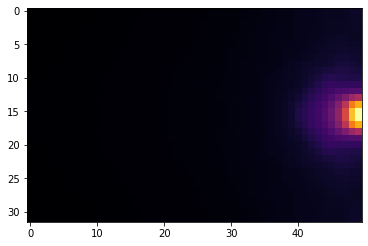

In [34]:
plt.imshow(xtd, cmap="inferno");

### Generate fake passing data

In [35]:
np.random.seed(42)

pass_df = pd.DataFrame(np.random.random((100, 4))*100, columns=['x1', 'x2', 'y1', 'y2']) ## our fake pass data coordinates
pass_df.head()

,x1,x2,y1,y2
0,37.454012,95.071431,73.199394,59.865848
1,15.601864,15.599452,5.808361,86.617615
2,60.111501,70.807258,2.058449,96.990985
3,83.244264,21.233911,18.182497,18.340451
4,30.424224,52.475643,43.194502,29.122914


In [36]:
### Bin the data according to the shape of the loaded xt array
###assuming 100 is the upper maximum limit
pass_df['x1_bin'] = pass_df.x1.apply(lambda val: int(val/(100/n_cols)) if val != 100 else int(val/(100/n_cols)) - 1 )
pass_df['x2_bin'] = pass_df.x2.apply(lambda val: int(val/(100/n_cols)) if val != 100 else int(val/(100/n_cols)) - 1 )

pass_df['y1_bin'] = pass_df.y1.apply(lambda val: int(val/(100/n_rows)) if val != 100 else int(val/(100/n_rows)) - 1 )
pass_df['y2_bin'] = pass_df.y2.apply(lambda val: int(val/(100/n_rows)) if val != 100 else int(val/(100/n_rows)) - 1 )

In [37]:
pass_df.head()

,x1,x2,y1,y2,x1_bin,x2_bin,y1_bin,y2_bin
0,37.454012,95.071431,73.199394,59.865848,18,47,23,19
1,15.601864,15.599452,5.808361,86.617615,7,7,1,27
2,60.111501,70.807258,2.058449,96.990985,30,35,0,31
3,83.244264,21.233911,18.182497,18.340451,41,10,5,5
4,30.424224,52.475643,43.194502,29.122914,15,26,13,9


In [38]:
### Now we just loop over every row and get correspoding xt value for the pass's start and end bins
%time
pass_df['start_zone_value'] = pass_df[['x1_bin', 'y1_bin']].apply(lambda x: xtd[x[1]][x[0]], axis=1)
pass_df['end_zone_value'] = pass_df[['x2_bin', 'y2_bin']].apply(lambda x: xtd[x[1]][x[0]], axis=1)


Wall time: 0 ns


In [39]:
pass_df.head()

,x1,x2,y1,y2,x1_bin,x2_bin,y1_bin,y2_bin,start_zone_value,end_zone_value
0,37.454012,95.071431,73.199394,59.865848,18,47,23,19,0.0107,0.1347
1,15.601864,15.599452,5.808361,86.617615,7,7,1,27,0.0058,0.0064
2,60.111501,70.807258,2.058449,96.990985,30,35,0,31,0.0150,0.0208
3,83.244264,21.233911,18.182497,18.340451,41,10,5,5,0.0323,0.0072
4,30.424224,52.475643,43.194502,29.122914,15,26,13,9,0.0103,0.0152


In [40]:
pass_df['pass_xt_value'] = pass_df['end_zone_value'] - pass_df['start_zone_value'] ##value of any pass is just value at end_zone - value at start_zone
pass_df = pass_df[[col for col in pass_df.columns if 'bin' not in col]] ##remove the bins/indices since they're useless now

In [41]:
pass_df.head()

,x1,x2,y1,y2,start_zone_value,end_zone_value,pass_xt_value
0,37.454012,95.071431,73.199394,59.865848,0.0107,0.1347,0.1240
1,15.601864,15.599452,5.808361,86.617615,0.0058,0.0064,0.0006
2,60.111501,70.807258,2.058449,96.990985,0.0150,0.0208,0.0058
3,83.244264,21.233911,18.182497,18.340451,0.0323,0.0072,-0.0251
4,30.424224,52.475643,43.194502,29.122914,0.0103,0.0152,0.0049


There you have it, xT value for every pass in your dataset. Have fun!